In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
# Load your dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
data.isnull().values.any()

False

In [53]:
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [54]:
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
total = fraud + non_fraud
fraud_percent = (fraud / total)

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: ", fraud_percent)

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions:  0.001727485630620034


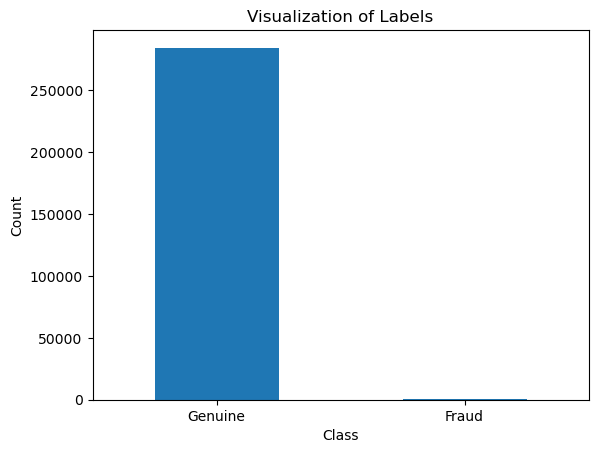

In [55]:
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [56]:
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = data["Class"]
X = data.drop(["Class"], axis= 1)

In [57]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [58]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.91456292499093


In [59]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators= 42)
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.9531851643786


In [60]:
#SVM 

svm = SVC()
svm.fit(train_X, train_Y)
predictions_svm = svm.predict(test_X)
svm_score = svm.score(test_X, test_Y) * 100
print("SVM Score: ", svm_score)

SVM Score:  99.94148145547324


In [61]:
#Defining a function for Cross Validation Test

def get_score(model, train_X,train_Y,test_X,test_Y):
    model.fit(train_X,train_Y)
    return model.score(test_X,test_Y)

In [62]:
#Cross Validation - (k-fold)

from sklearn.model_selection import KFold
kf = KFold(n_splits=100)

#Decision Tree
kfdt = get_score(DecisionTreeClassifier(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for Decison Tree Classifier : ",kfdt*100)

#Random Forest
kfrf = get_score(RandomForestClassifier(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for Random Forest Classifier : ",kfrf*100)

#SVM
kfsvm = get_score(SVC(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for SVM : ",kfsvm*100)



Score using k-fold cross validation for Decison Tree Classifier :  99.9098814414288
Score using k-fold cross validation for Random Forest Classifier :  99.95084442259751
Score using k-fold cross validation for SVM :  99.94148145547324


In [63]:
#Deciding the best model

if (kfdt > kfrf and kfdt > kfsvm):
    print("Using Decision Tree Classifier since it has hightest score")
elif (kfrf > kfdt and kfrf > kfsvm):
    print("Using Random Forest Classifier since it has hightest score")
else:
    print("Using SVM since it has hightest score")




Using Random Forest Classifier since it has hightest score


In [64]:
n_outliers = fraud 
n_errors = (predictions_rf != test_Y).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(test_Y, predictions_rf) *100
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(test_Y, predictions_rf) *100
print("The precision is {}".format(prec)) 
  
rec = recall_score(test_Y, predictions_rf) *100
print("The recall is {}".format(rec)) 
  
f1 = f1_score(test_Y, predictions_rf) *100
print("The F1-Score is {}".format(f1)) 

The model used is Random Forest classifier
The accuracy is 99.9531851643786
The precision is 93.20388349514563
The recall is 74.4186046511628
The F1-Score is 82.75862068965517


Confusion Matrix - Random Forest
[[85307     7]
 [   33    96]]


<AxesSubplot:>

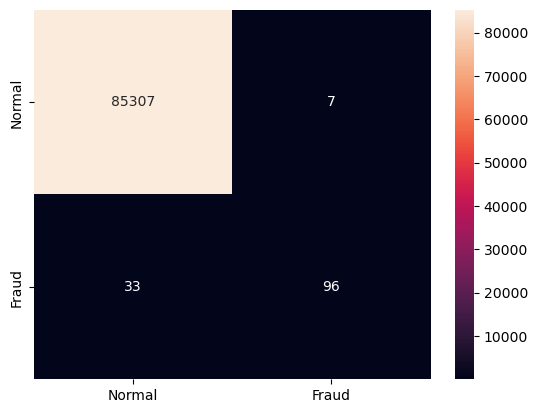

In [65]:
#Confusion Matrix - Random Forest

LABELS = ['Normal', 'Fraud'] 
cm_resampled = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
sns.heatmap(cm_resampled,xticklabels = LABELS, yticklabels = LABELS,annot= True, fmt ="d")